<a href="https://colab.research.google.com/github/lukehdez95/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-multiple-regression/LS_DS_133_Multiple_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unit 1, Sprint 3, Module 3

###Learning Objectives:
- Student can model the relationship of multple predictor variables to a single outcome.
- Student can conduct a t-test to determine the significance of individual variables in the model.
- Student can compare model fit using R-squared

#Use the following information to answer assignment questions 1 - 13.

###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if we can improve on our model of the linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [1]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


From the data dictionary:

Gender: 1 = male, 2 = female

Age: 1 = younger than age 46, 2 = age 46 and older

1) Run the OLS model relating head size to brain weight (you should have done this in your project yesterday) and print your results

In [4]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols

model = ols('Brain ~ Head', data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           5.96e-54
Time:                        01:31:25   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

2) What is the adjusted $R^2$ for this model?  Explain what this value means in a complete sentence.



Answer here:  64% of the variability in the brain weight is explained by differences in head size.


3) Right now age and gender are coded with 1 and 2.  Just to be safe when we run our model, we want to subtract "1" from Age and Gender so that "1" is now coded as "0" and "2" is now coded as "1".  Create two new variables in the dataframe to do this - don't overwrite the original variables.

In [6]:
### YOUR CODE HERE ###
df['Age_b'] = df['Age'] - 1
df['Gender_b'] = df['Gender'] - 1
df.head()

,Gender,Age,Head,Brain,Age_b,Gender_b
0,1,1,4512,1530,0,0
1,1,1,3738,1297,0,0
2,1,1,4261,1335,0,0
3,1,1,3777,1282,0,0
4,1,1,4177,1590,0,0


4) Model the relationship of age group and head size to brain weight.

In [7]:
### YOUR CODE HERE ###

model = ols('Brain ~ Head + Age_b', data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     214.1
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.38e-53
Time:                        01:39:07   Log-Likelihood:                -1347.8
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     234   BIC:                             2712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.5505     47.811      7.269      0.0

5) At the alpha = 0.05 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Answer here: Yes, the p value for Age_b according to my OLS model is less than 0.05, meaning we reject the null hypothesis and conclude that Age_b is statistically significantly associated with brain weight after accounting for head size.

6) At the alpha = 0.01 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Answer here: No, the p value for Age_b according to my OLS model is not less than 0.01, meaning that we fail to reject the null hypothesis and conclude that at the 0.01 significance level, age group is not statistically significantly associated with brain weight, after accounting for head size.


7) What is the adjusted $R^2$ for the model relating head size and age group to brain weight?  Does adding age group to the model increase the amount of variability in brain weight explained by the model?

Answer here: The adjusted R squared for the model is 0.644, so it does increase the variability in brain weight explained by the model, but only very slightly.

8) Model the relationship of gender and head size to brain weight.

In [8]:
### YOUR CODE HERE ###
model = ols('Brain ~ Head + Gender_b', data = df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           4.15e-53
Time:                        01:44:47   Log-Likelihood:                -1348.9
No. Observations:                 237   AIC:                             2704.
Df Residuals:                     234   BIC:                             2714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    378.7139     57.299      6.609      0.0

9) At the alpha = 0.05 level, is gender statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Answer here: At the 0.05 significance level, our p value for gender is .107. Being that this is above the significance level, we failed to reject the null hypothesis and conclude that gender is not statistically significantly associated with brain weight after accounting for head size.

10) Write the linear model (insert the coefficients in the correct places) used to model the relationship between head size, age group and predicted brain weight.




Answer here: $\hat{y}$ = 378.71 + 0.25 x Head - 20.73 x Age_b

11) Plot the relationship between head size and brain weight on a scatterplot. Use different color dots to represent older and younger individuals.

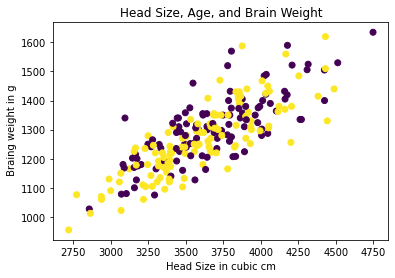

In [9]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.scatter(x = df['Head'], y = df['Brain'], c = df['Age_b'])

ax.set_title('Head Size, Age, and Brain Weight')
ax.set_xlabel('Head Size in cubic cm')
ax.set_ylabel('Brain weight in g')

plt.show()

12) Estimate the brain weight of a 60-year-old with a head size of 4000 cubic cm.

In [11]:
### YOUR CODE HERE ###
model = ols('Brain ~ Head + Age_b', data = df).fit()
model.params

intercept = model.params[0]
slope1 = model.params[1]
slope2 = model.params[2]

x1 = 4000
x2 = 1

predicted = intercept + slope1*x1 + slope2*x2
predicted

1368.573921722076

Answer here: 1368.57g

13) Estimate the brain weight of a 20-year-old with a head size of 3900 cubic cm.

In [13]:
### YOUR CODE HERE ###

x1 = 3900
x2 = 0

predicted = intercept + slope1*x1 + slope2*x2
predicted

1363.261689710586

Answer here: 1363.26g

###Use the following information to answer questions 14 - 20


Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [15]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep['Log_gest'] = np.log(sleep['Gest'])

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Log_gest
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,3.737670
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,6.436150
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,5.192957
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,3.555348
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.971262


14) Plot the relationship of body size to dreaming sleep and describe the shape of the relationship.

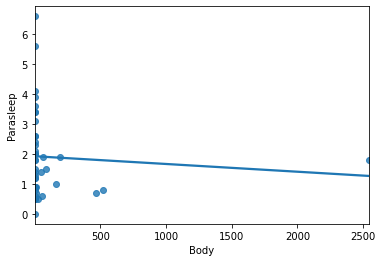

In [16]:
### CODE HERE ###
import seaborn as sns
ax = sns.regplot(x = 'Body', y = 'Parasleep', data = sleep, ci = None)

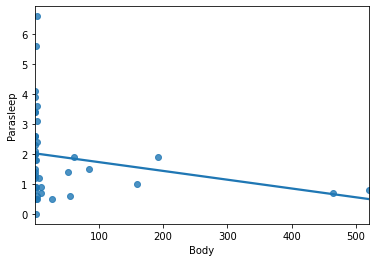

In [18]:
sleep_edited = sleep.drop(index=1)
ax = sns.regplot(x = 'Body', y = 'Parasleep', data = sleep_edited, ci = None) #Was curious as to how the graph looked like without the Elephant in the room

Answer here: There seems to be an inverse relationship between body size and dreaming sleep, but the relationship does not appear to be linear.

15) Does it appear that a log transformation would improve the model fit?  If yes, perform the log transformation and plot the resulting relationship with dreaming sleep.

In [20]:
### CODE HERE ###
sleep['Log_body'] = np.log(sleep['Body'])
sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Log_gest,Log_body
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,3.737670,0.000000
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,6.436150,7.842671
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,5.192957,2.356126
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,3.555348,-3.772261
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.971262,5.075174


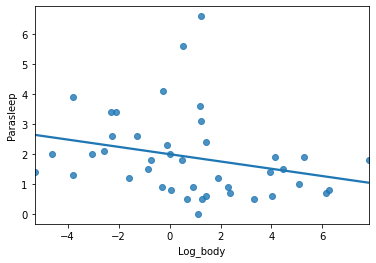

In [21]:
ax = sns.regplot(x = 'Log_body', y = 'Parasleep', data = sleep, ci = None)

Answer here: Yes it definitely would benefit from a log transformation

16) Run an ols model using gestation time, danger index and the log of body size.  Is the log of body size statistically significantly associated with time spent in dreaming sleep after accounting for the other two factors?

In [22]:
### CODE HERE ###
model = ols('Parasleep ~ Gest + Danger + Log_body', data = sleep).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     8.764
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           0.000152
Time:                        02:32:29   Log-Likelihood:                -61.841
No. Observations:                  42   AIC:                             131.7
Df Residuals:                      38   BIC:                             138.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8144      0.429      8.894      0.0

Answer here: Log of body size has a p value of .247, which is grater than our 0.05 significance level, as a result we fail to reject the null hypothesis and must concluse that log of body size is not statisically significantly asssociated with time spent in dreaming sleep after accounting for gestation time and danger index.

17) Plot the relationship of gestational time and dreaming sleep with different colors for animals who experience different amounts of sleep exposure.

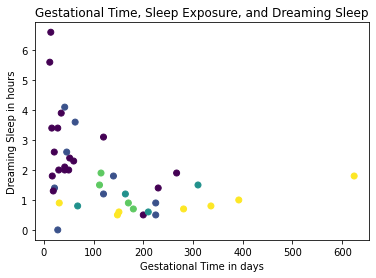

In [24]:
### CODE HERE ###
fig, ax = plt.subplots()

plt.scatter(x = sleep['Gest'], y = sleep['Parasleep'], c = sleep['Exposure'])

ax.set_title('Gestational Time, Sleep Exposure, and Dreaming Sleep')
ax.set_xlabel('Gestational Time in days')
ax.set_ylabel('Dreaming Sleep in hours')

plt.show()

Answer here: 

18) Run an ols model using the log of gestation time and sleep exposure index to predict the amount of time spent in dreaming sleep.  Is sleep exposure index a better predictor of amount of time spent in dreaming sleep than danger index?

In [30]:
### CODE HERE ###
model = ols('Parasleep ~ Log_gest + Exposure', data = sleep).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     11.52
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           0.000117
Time:                        02:43:30   Log-Likelihood:                -63.137
No. Observations:                  42   AIC:                             132.3
Df Residuals:                      39   BIC:                             137.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8688      0.770      6.321      0.0

Answer here: No it is not, I say this because in our guided project, the model with danger index has a 0.496 Adjusted R squared value which is greater than the 0.339 adjusted r squared value generated by this model.

19) Plot the relationship of gestational time and dreaming sleep with different colors for animals who experience different amounts of sleep exposure.

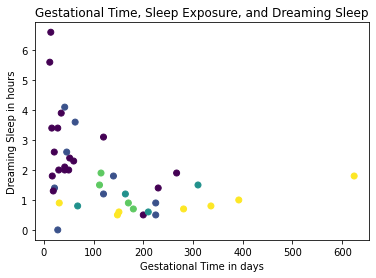

In [25]:
### CODE HERE ###
fig, ax = plt.subplots()

plt.scatter(x = sleep['Gest'], y = sleep['Parasleep'], c = sleep['Exposure'])

ax.set_title('Gestational Time, Sleep Exposure, and Dreaming Sleep')
ax.set_xlabel('Gestational Time in days')
ax.set_ylabel('Dreaming Sleep in hours')

plt.show()

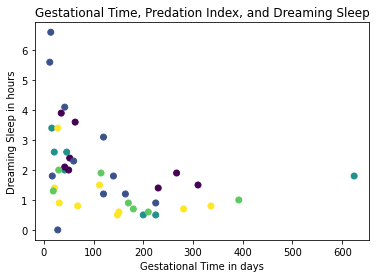

In [31]:
#I assume this question meant to use predation index and not exposure for the follow up question.
fig, ax = plt.subplots()

plt.scatter(x = sleep['Gest'], y = sleep['Parasleep'], c = sleep['Pred'])

ax.set_title('Gestational Time, Predation Index, and Dreaming Sleep')
ax.set_xlabel('Gestational Time in days')
ax.set_ylabel('Dreaming Sleep in hours')

plt.show()

Answer here: 

20) Run an ols model using the log of gestation time and predation index to predict the amount of time spent in dreaming sleep.  Is predation index a better predictor of amount of time spent in dreaming sleep than danger index?

In [32]:
### CODE HERE ###
model = ols('Parasleep ~ Log_gest + Pred', data = sleep).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     15.85
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           9.15e-06
Time:                        02:52:07   Log-Likelihood:                -60.389
No. Observations:                  42   AIC:                             126.8
Df Residuals:                      39   BIC:                             132.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9844      0.753      7.951      0.0

Answer here: No it is not, I say this because in our guided project, the model with danger index has a 0.496 Adjusted R squared value which is greater than the 0.420 adjusted r squared value generated by this model.

#Portfolio Project Assignment

Get (and give) constructive feedback to a peer.  Swap projects with at least one other student, and give each other constructive feedback.  Make sure to tell them what you like about their project as well as any suggestions you have for imporvement.



---

